## Imports

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

## Loading The Dataset

In [2]:
df = pd.read_csv("C:/Users/robah/OneDrive/Desktop/Konecta/Session4/Wholesale customers data.csv")
df
#The dataset describes the annual spending per category for sample customers.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Exploring The Dataset

In [3]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df['Channel'].unique()
# HORECA(hotel/restaurant/cafe) or Retail channel

array([2, 1])

In [8]:
df['Region'].unique()
# Lisnon, Oporto or Other

array([3, 1, 2])

In [23]:
res = df.corr()
res

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

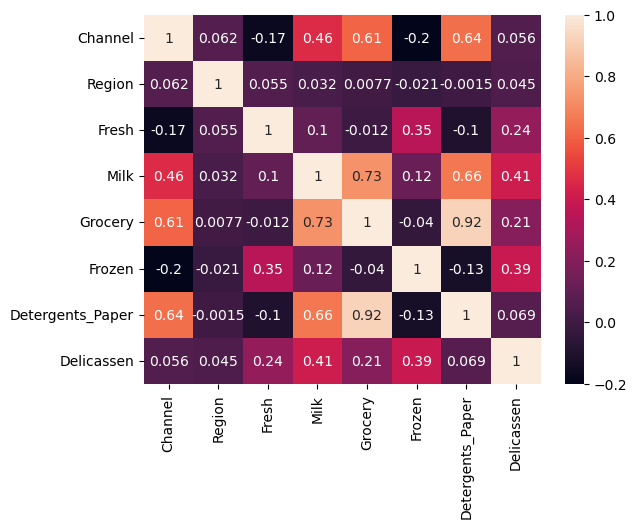

In [25]:
sns.heatmap(res, annot=True)

There is a correlation between the channel and the spending on grocery and detergents_paper.

There is almost no correltion between the region and any of the spending patterns.

There is almost no correltion between the fresh and any of the spending patterns.

There is a relation between milk and grocery and detergents spending.


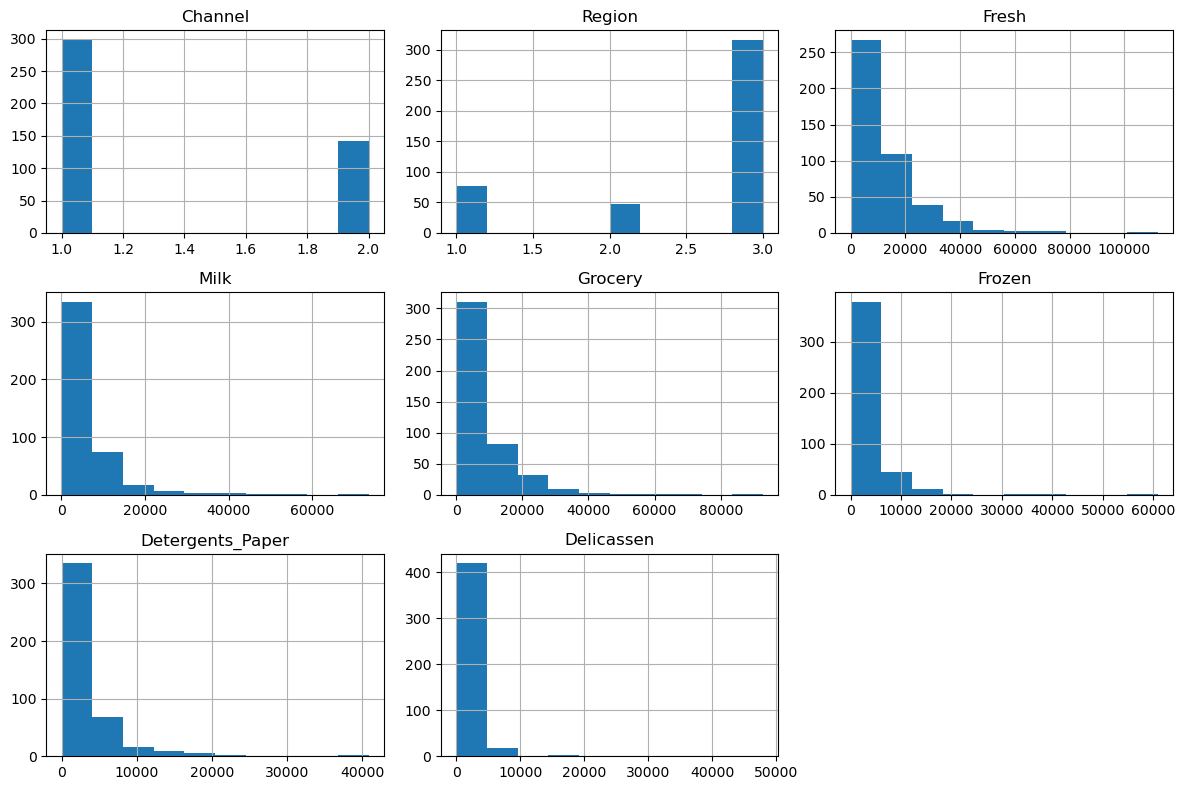

In [27]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

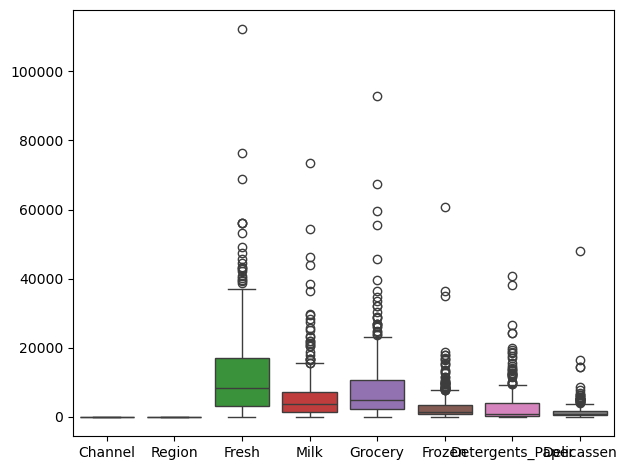

In [28]:
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

In [49]:
categories = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
sum_per_category = df[categories].sum()
sum_per_category = sum_per_category.sort_values()
sum_per_category

Delicassen           670943
Detergents_Paper    1267857
Frozen              1351650
Milk                2550357
Grocery             3498562
Fresh               5280131
dtype: int64

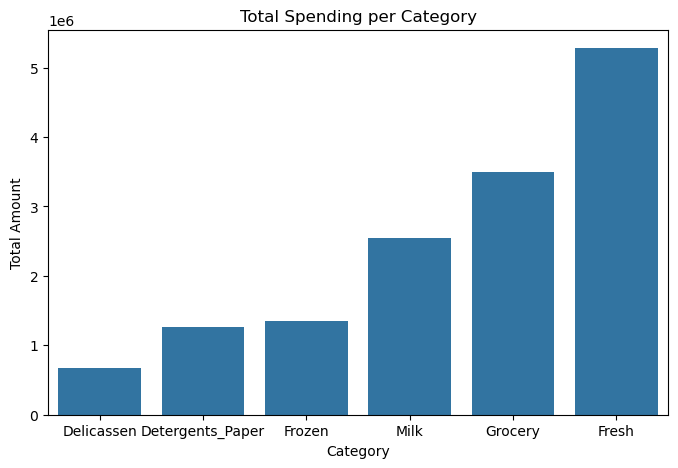

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x=sum_per_category.index, y=sum_per_category.values)
plt.title("Total Spending per Category")
plt.xlabel('Category')
plt.ylabel("Total Amount")
plt.show()

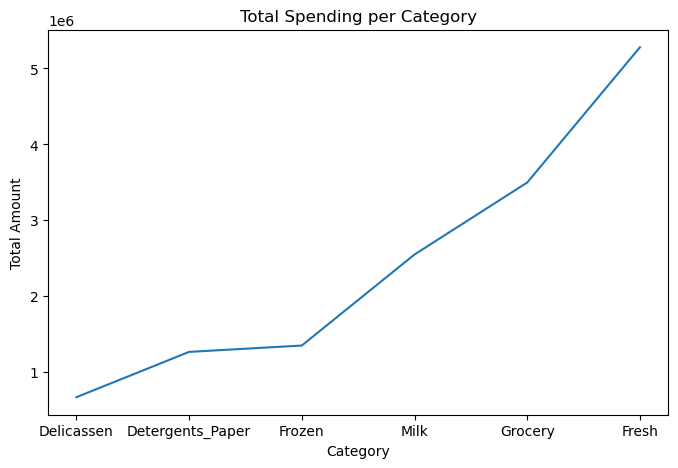

In [52]:
plt.figure(figsize=(8,5))
plt.plot(sum_per_category.index, sum_per_category.values)
plt.title("Total Spending per Category")
plt.xlabel('Category')
plt.ylabel("Total Amount")
plt.show()

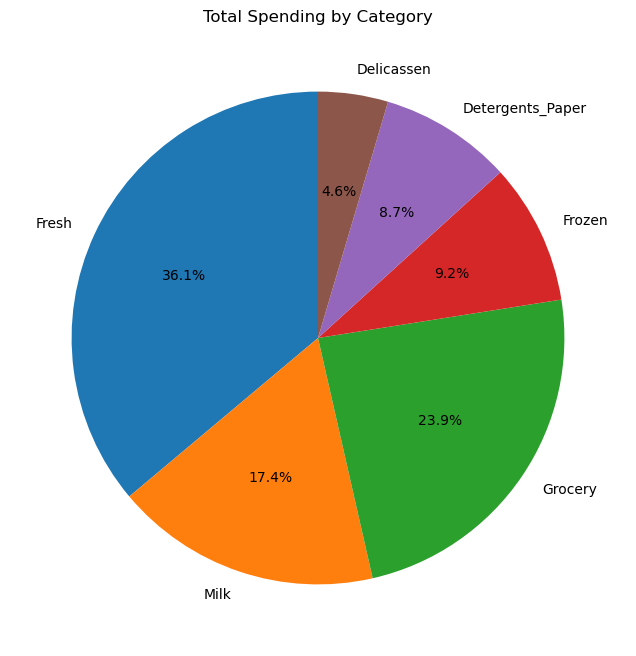

In [35]:
plt.figure(figsize=(8,8))
plt.pie(sum_per_category, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title("Total Spending by Category")
plt.show()

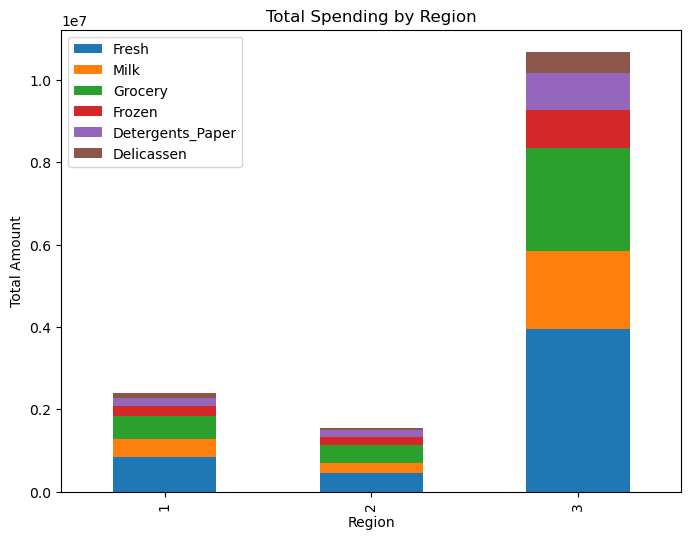

In [37]:
region_sum = df.groupby("Region")[categories].sum()
region_sum.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Total Spending by Region")
plt.ylabel("Total Amount")
plt.show()

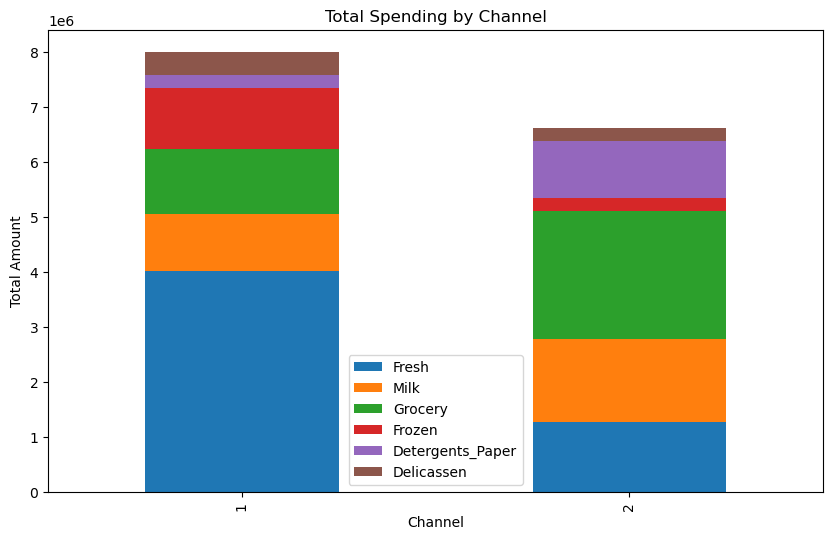

In [40]:
channel_sum = df.groupby("Channel")[categories].sum()
channel_sum.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Total Spending by Channel")
plt.ylabel("Total Amount")
plt.show()

Channel
1    298
2    142
Name: count, dtype: int64


Text(0, 0.5, 'Number of Customers')

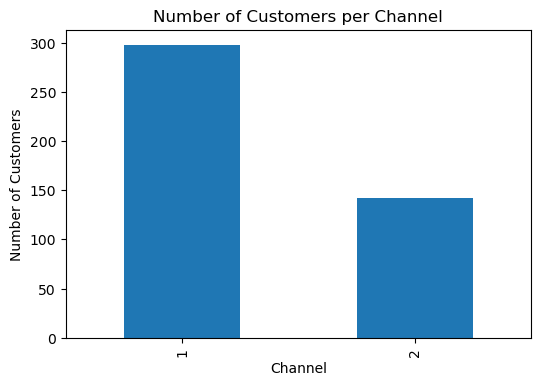

In [96]:
channel_counts = df['Channel'].value_counts()
print(channel_counts)

plt.figure(figsize=(6, 4))
channel_counts.plot(kind='bar')
plt.title('Number of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')

Region
3    316
1     77
2     47
Name: count, dtype: int64


Text(0, 0.5, 'Number of Customers')

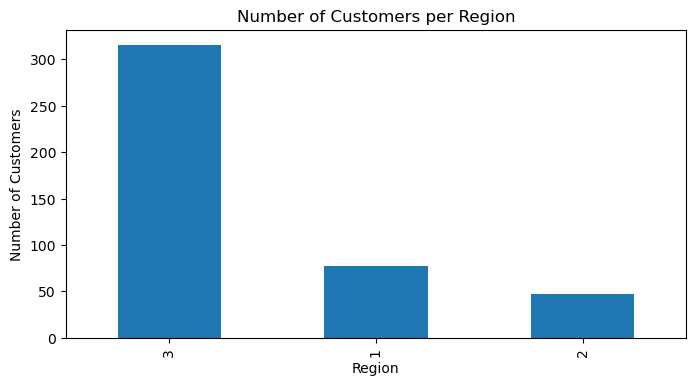

In [101]:
region_counts = df['Region'].value_counts()
print(region_counts)

plt.figure(figsize=(8, 4))
region_counts.plot(kind='bar')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')

## Preprocessing

In [57]:
print(df[categories].skew())

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


In [55]:
print(df.kurt())

Channel              -1.427463
Region               -0.100111
Fresh                11.536408
Milk                 24.669398
Grocery              20.914670
Frozen               54.689281
Detergents_Paper     19.009464
Delicassen          170.694939
dtype: float64


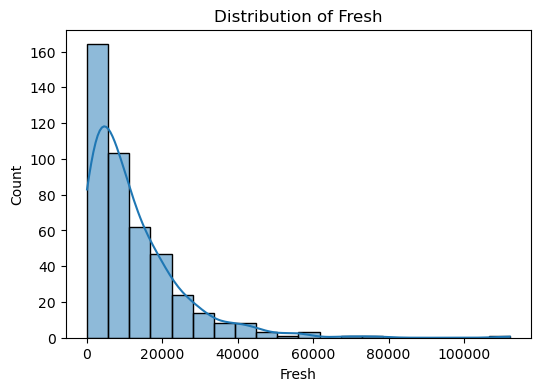

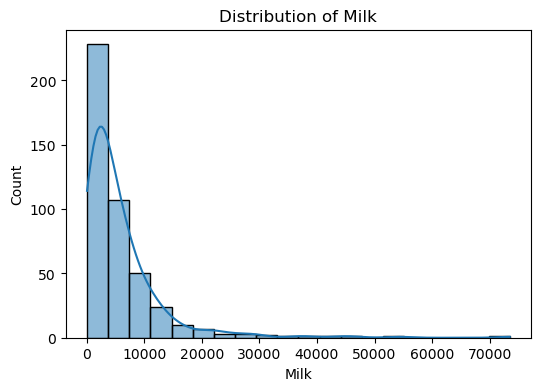

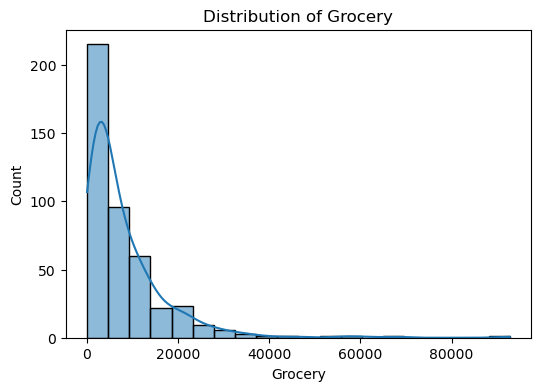

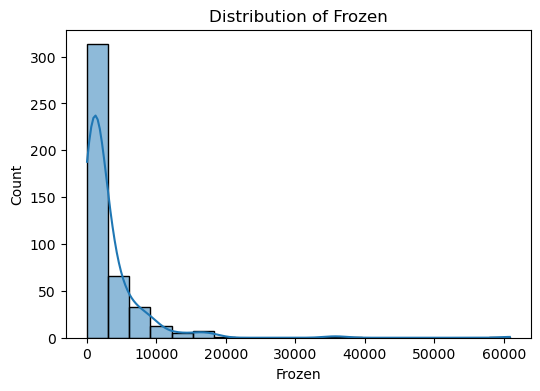

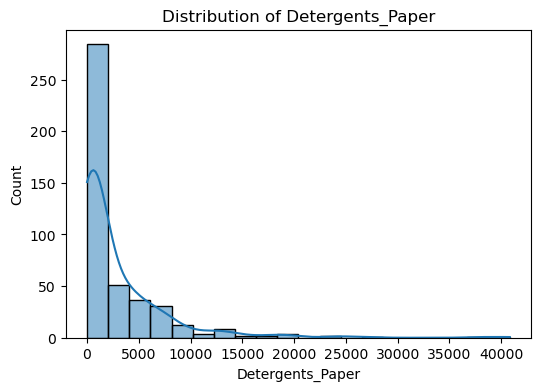

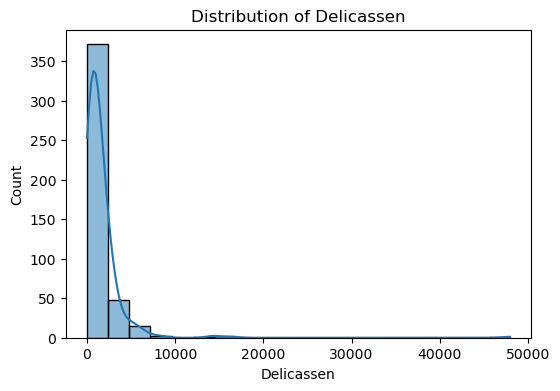

In [63]:
for col in categories:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20) 
    plt.title(f"Distribution of {col}")
    plt.show()

All columns are skewed to the right and there are no zero values in the columns so will try to apply log transformation for all columns except region and channel

In [65]:
df_log = np.log(df[categories])

In [66]:
print(df_log.skew())

Fresh              -1.629685
Milk               -0.226941
Grocery            -0.739662
Frozen             -0.360806
Detergents_Paper   -0.272132
Delicassen         -1.177171
dtype: float64


In [67]:
print(df_log.kurt())

Fresh               4.435698
Milk                0.219272
Grocery             3.702592
Frozen              0.287804
Detergents_Paper   -0.187484
Delicassen          3.158462
dtype: float64


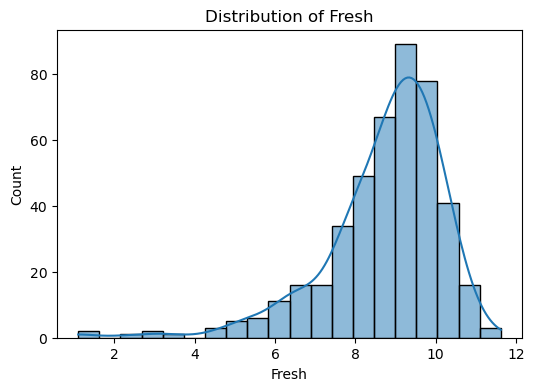

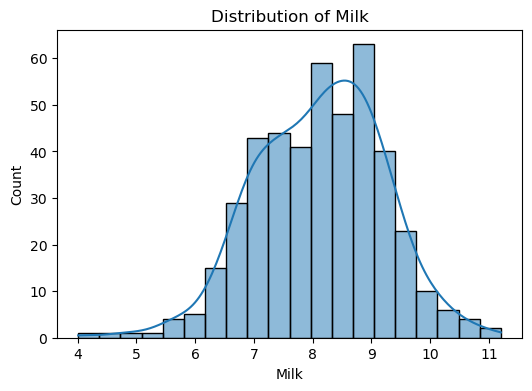

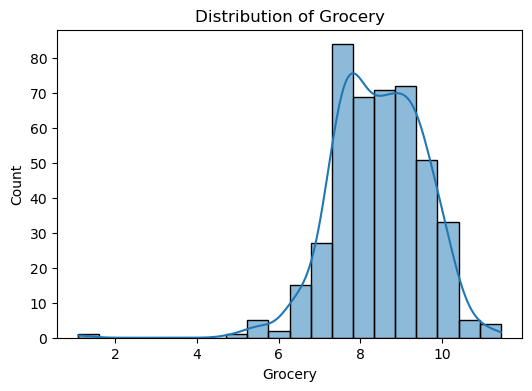

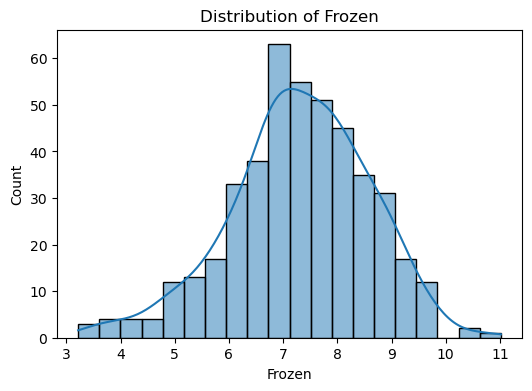

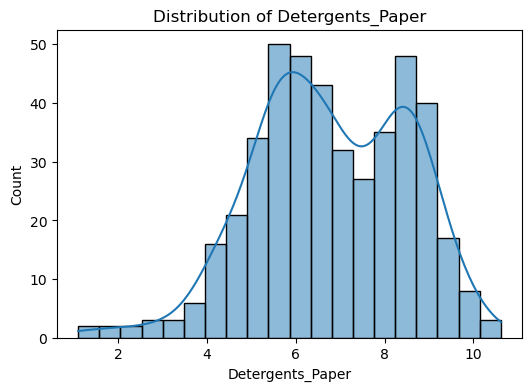

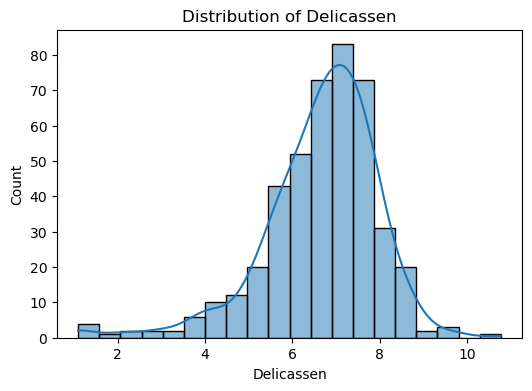

In [68]:
for col in categories:
    plt.figure(figsize=(6,4))
    sns.histplot(df_log[col], kde=True, bins=20) 
    plt.title(f"Distribution of {col}")
    plt.show()

In [69]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_log)
df_log = pd.DataFrame(scaled_df, columns=df_log.columns)
df_log

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246
...,...,...,...,...,...,...
435,1.060925,1.181199,1.112977,1.700316,-0.920248,0.788867
436,1.249064,-0.791491,-1.616824,0.867177,-1.310814,0.836554
437,0.577315,1.413502,1.682525,-0.951977,1.639949,0.662131
438,0.343877,-0.490392,-0.655228,-0.277726,-0.966810,0.760989


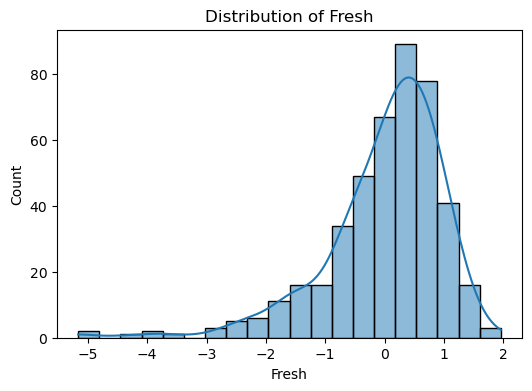

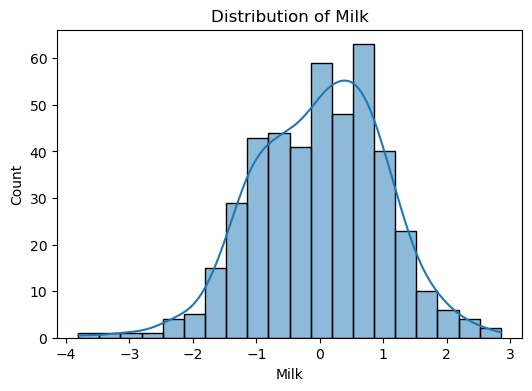

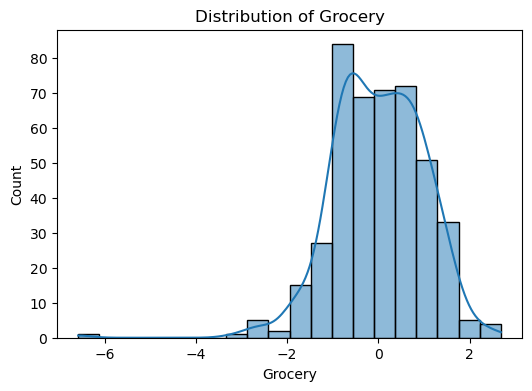

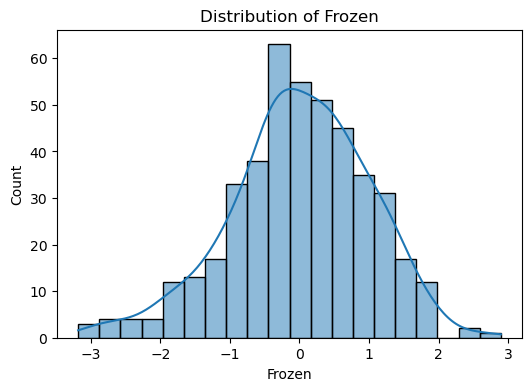

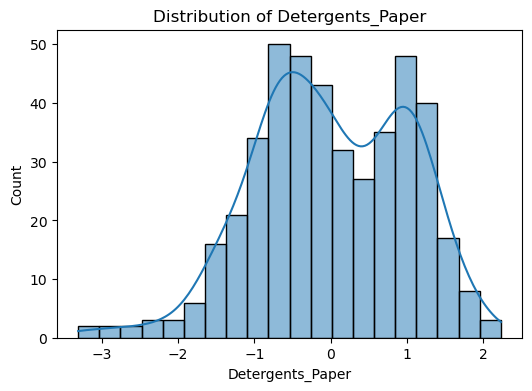

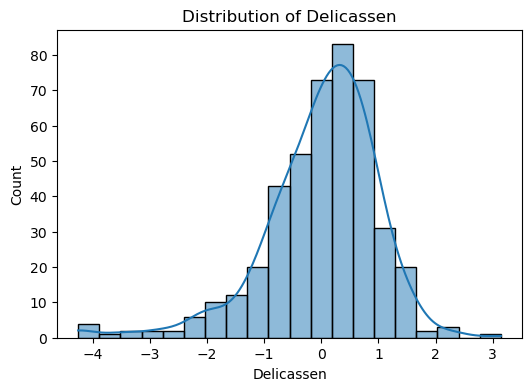

In [70]:
for col in categories:
    plt.figure(figsize=(6,4))
    sns.histplot(df_log[col], kde=True, bins=20) 
    plt.title(f"Distribution of {col}")
    plt.show()

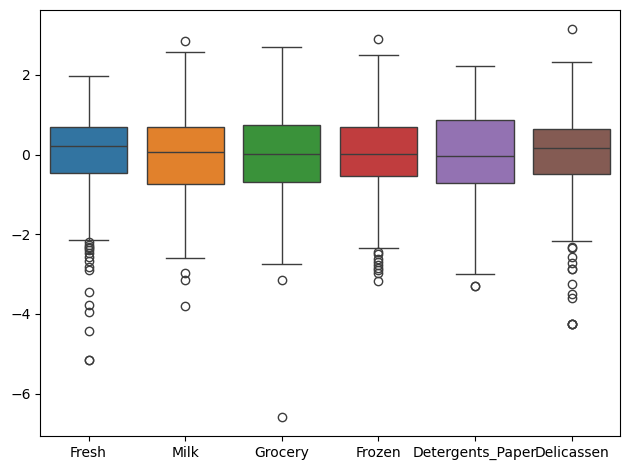

In [71]:
sns.boxplot(data=df_log)
plt.tight_layout()
plt.show()

In [233]:
results = []

def add_results(method, silhouette=None, dbi=None, chi=None):
    results.append({
        "method": method,
        "silhouette": silhouette,
        "dbi": dbi,
        "chi": chi
    })

## K-means Clustering

C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

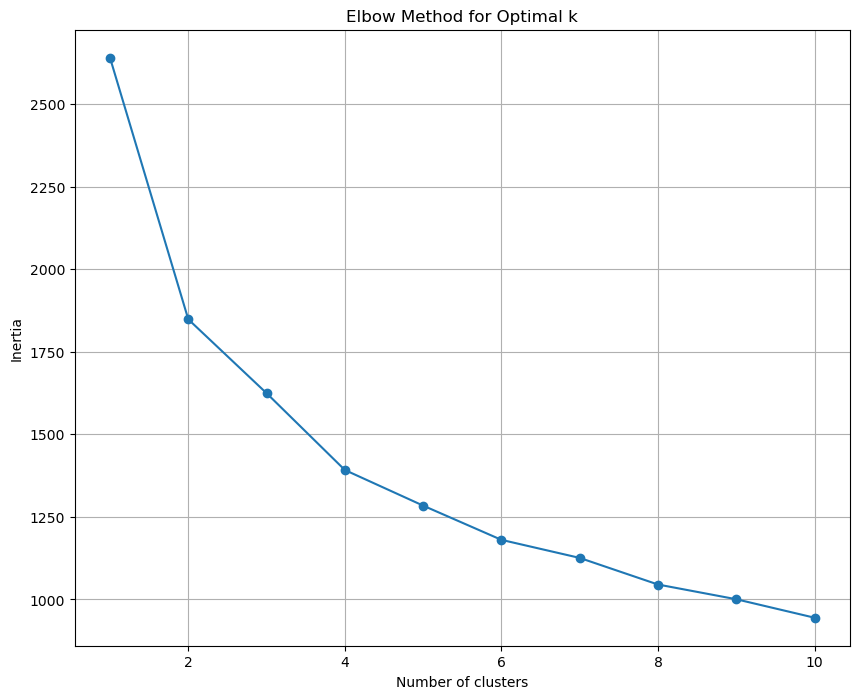

In [84]:
#function to find optimum k

def optimum_k(df, max_k):
    inertia = []
    k_range = range(1,max_k+1)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state =30)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 8))
    plt.plot(k_range, inertia, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.title('Elbow Method for Optimal k')
    plt.show()

optimum_k(df_log, 10)

In [221]:
#df_log = df_log.drop(columns=['k_clusters_5']) 

In [220]:
kmeans = KMeans(n_clusters=7, random_state=30)
df_log['k_clusters_7'] = kmeans.fit_predict(df_log)

C:\Users\robah\miniconda\envs\konecta\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [214]:
df_clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685,2
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967,2
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420,2
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110,0
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246,0
...,...,...,...,...,...,...,...
435,1.060925,1.181199,1.112977,1.700316,-0.920248,0.788867,0
436,1.249064,-0.791491,-1.616824,0.867177,-1.310814,0.836554,0
437,0.577315,1.413502,1.682525,-0.951977,1.639949,0.662131,2
438,0.343877,-0.490392,-0.655228,-0.277726,-0.966810,0.760989,1


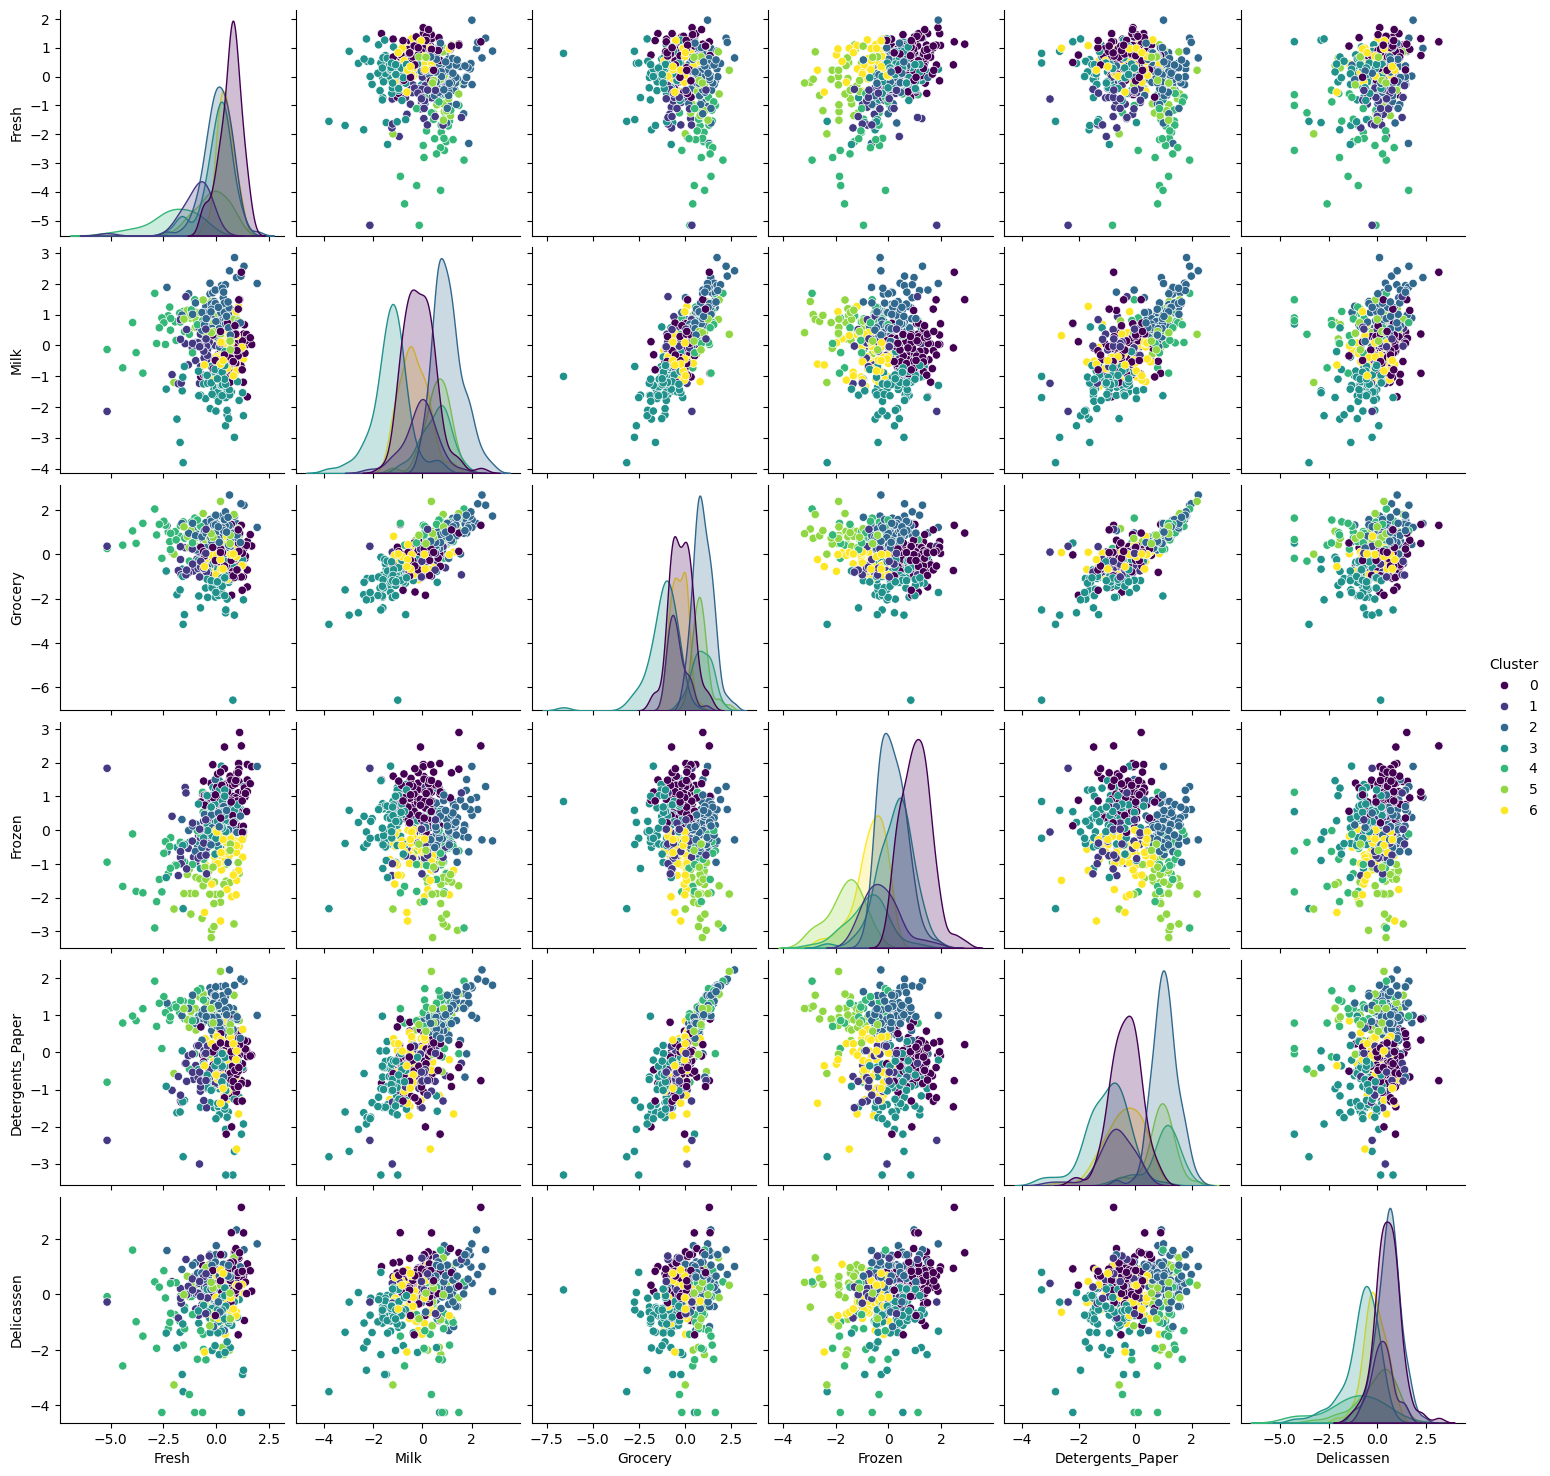

In [215]:
df_clustered = pd.DataFrame(df_log, columns=categories)
df_clustered["Cluster"] = kmeans.labels_
sns.pairplot(df_clustered, hue="Cluster", palette="viridis")
plt.show()

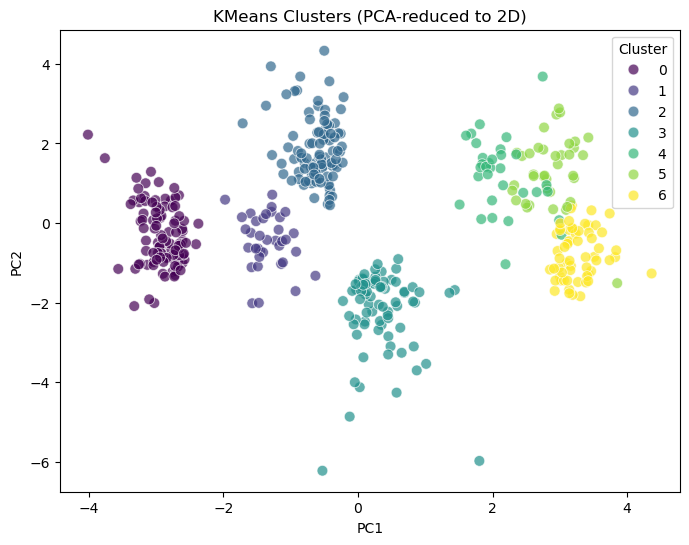

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Cluster                                                                         
0        0.669950 -0.132905 -0.233285  1.044526         -0.357861    0.509995   
1       -0.987892 -0.106296 -0.425018 -0.240882         -0.718019    0.245952   
2        0.098458  1.039471  0.963786  0.148010          1.037727    0.560851   
3        0.057076 -1.289746 -1.218552  0.253191         -1.001135   -0.809611   
4       -2.046909  0.532988  0.899601 -0.811848          0.958766   -1.185277   
5       -0.175493  0.590212  0.842819 -1.634186          0.883730   -0.100284   
6        0.447250 -0.359261 -0.327693 -0.694340         -0.402680   -0.146769   

         k_clusters_5  
Cluster                
0                 0.0  
1                 1.0  
2                 2.0  
3                 3.0  
4                 4.0  
5                 5.0  
6                 6.0  


In [216]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_log)   

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=df_pca,
    alpha=0.7,
    s=60)

plt.title('KMeans Clusters (PCA-reduced to 2D)')
plt.show()

cluster_summary = df_log.copy()
cluster_summary['Cluster'] = kmeans.labels_
cluster_profile = cluster_summary.groupby('Cluster').mean()
print(cluster_profile)


Cluster 0 : High spending on frozen then fresh then delicassen products and much lower demand on milk, grocery and detergents_paper.

Cluster 1: Low spending on Fresh, Grocery, and Detergents, average on Milk & Frozen, slightly higher on Delicatessen.

Cluster 2: Very High spending on milk, grocery, and detergents_paper. Much lower spending patterns on frozen and fresh products and an average spending on delicassen products.

Cluster 3: Low spending in general but specifically it has very low spending on milk, grocery, detergents_paper and delicaseen and a little higher spending on frozen products.

Cluster 4: Very low spending on fresh products, a bit higher spending on delicassen frozen products. Higher spending on milk, grocery and detergents_paper products.

Cluster 5: Lowest spending on frozen products. Higher spending than cluster 4 in all of the remaining categories.

Cluster 6: Low spending on avergae and highest spending on milk and fresh products.

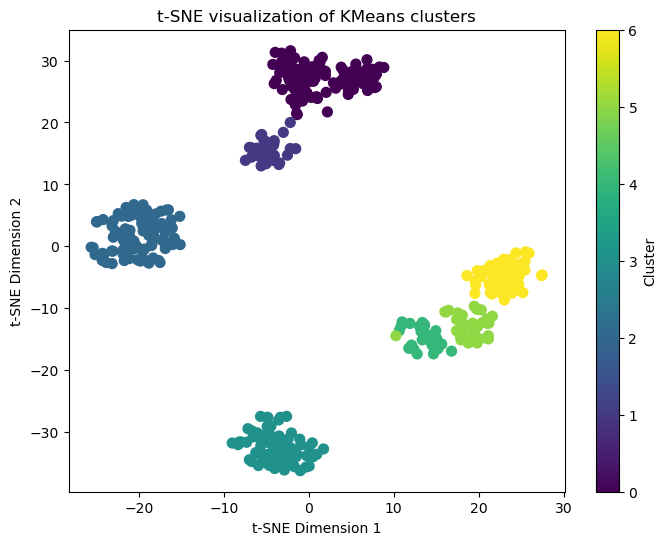

In [217]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)

X_tsne = tsne.fit_transform(df_log)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("t-SNE visualization of KMeans clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

Some clusters share similar patterns since they are close to each other as clusters 4,5,6. They are distinct from the other 4 clusters.

Cluster 3 and 2 are distinct from the other clsusters since they are closly packed into a single space and are not scattered or near other clusters.

Cluster 0 and 1 are a bit close to each other but they don't overlap.

In [218]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    100
1     36
2     96
3     78
4     32
5     38
6     60
Name: count, dtype: int64

In [225]:
sil_kmeans = silhouette_score(df_log, kmeans.labels_)
sil_kmeans

0.3383038160247702

Tried values of k from 4 till 8 and k=7 had the highest silhouette score.

In [231]:
dbi_kmeans = davies_bouldin_score(df_log, kmeans.labels_)
dbi_kmeans

1.171655621951709

In [232]:
chi_kmeans = calinski_harabasz_score(df_log, kmeans.labels_)
chi_kmeans

191.53732756424597

In [234]:
add_results('Kmeans', sil_kmeans, dbi_kmeans, chi_kmeans)

## Hierarchical 

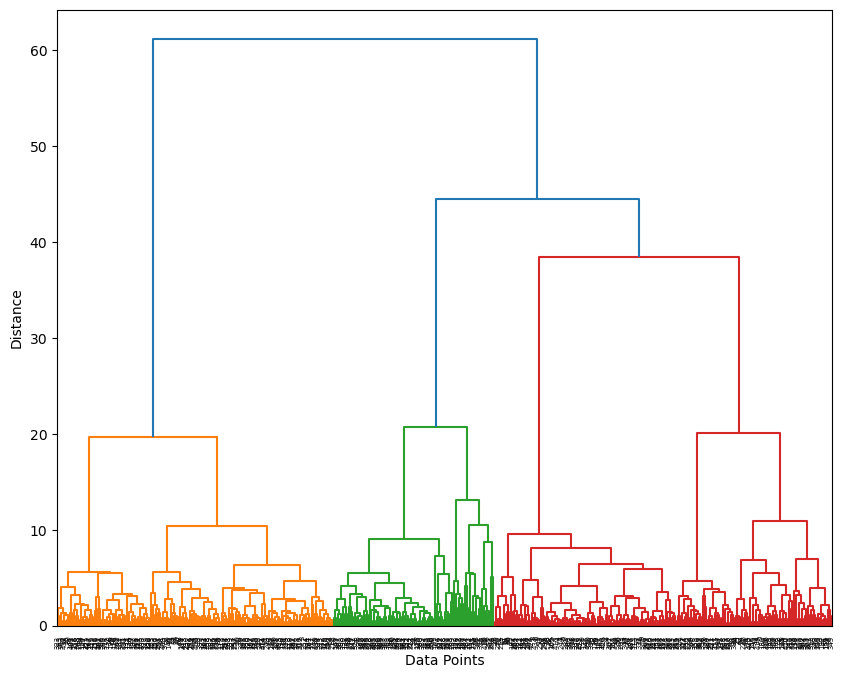

In [239]:
plt.figure(figsize=(10, 8))
linkage_data = linkage(df_log, method='ward', metric='euclidean')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(linkage_data)
plt.show()

In [240]:
scores = []
for t in range(2, 11):
    clusters = fcluster(linkage_data, t=t, criterion='maxclust')
    sil = silhouette_score(df_log, clusters)
    dbi = davies_bouldin_score(df_log, clusters)
    chi = calinski_harabasz_score(df_log, clusters)
    scores.append((t, sil, dbi, chi))

for s in scores:
    print(f"t={s[0]}: Silhouette={s[1]:.3f}  DBI={s[2]:.3f}  CHI={s[3]:.3f}")

t=2: Silhouette=0.332  DBI=1.133  CHI=226.774
t=3: Silhouette=0.389  DBI=1.164  CHI=238.135
t=4: Silhouette=0.418  DBI=0.924  CHI=277.601
t=5: Silhouette=0.433  DBI=1.206  CHI=248.284
t=6: Silhouette=0.437  DBI=1.136  CHI=237.319
t=7: Silhouette=0.393  DBI=1.172  CHI=238.309
t=8: Silhouette=0.397  DBI=1.107  CHI=222.800
t=9: Silhouette=0.388  DBI=1.155  CHI=207.588
t=10: Silhouette=0.383  DBI=1.159  CHI=195.891


t =6 seems to balance between the 3 matrix

In [261]:
clusters = fcluster(linkage_data, t=6, criterion='maxclust')
df_log['hir_clusters'] = clusters

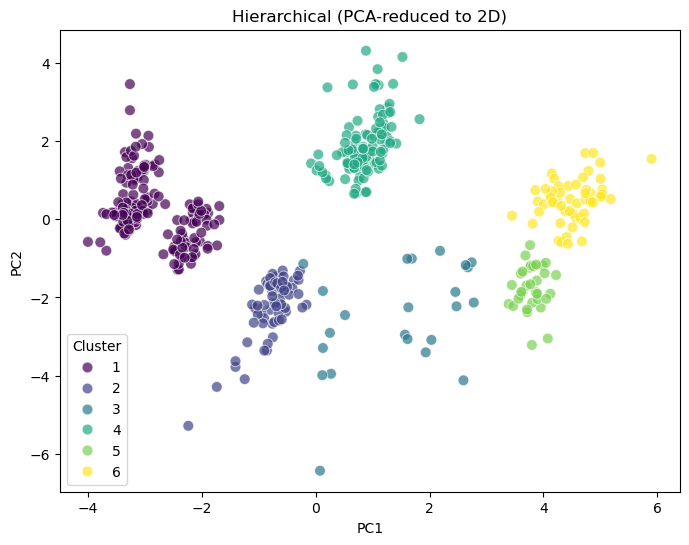

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Cluster                                                                         
1        0.592381 -0.226561 -0.281455  0.425511         -0.392936    0.271034   
2        0.232420 -1.244776 -1.180342  0.407179         -0.943305   -0.661538   
3       -1.985732 -0.767220 -0.339222 -0.899208         -0.717368   -2.114221   
4        0.135816  0.966675  0.929007  0.078937          0.991852    0.519457   
5       -0.883464 -0.020217 -0.512706 -0.294364         -0.597222    0.241787   
6       -0.874675  0.690797  0.955572 -1.314672          1.070743   -0.198967   

         k_clusters_7  hir_clusters  
Cluster                              
1            0.375796           1.0  
2            3.000000           2.0  
3            3.739130           3.0  
4            1.923077           4.0  
5            6.000000           5.0  
6            4.763636           6.0  


In [262]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_log)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    alpha=0.7,
    s=60
)
plt.title('Hierarchical (PCA-reduced to 2D)')
plt.show()

# Cluster profiling
cluster_summary = df_log.copy()
cluster_summary['Cluster'] = clusters
cluster_profile = cluster_summary.groupby('Cluster').mean()
print(cluster_profile)

Cluster 1: Average spedning on fresh, frozen and lower spending on delicassen products. Low spending on milk,grocery and detergents_paper products.

Cluster 2:Low spending on average. Very low spending on milk, grocery, detergents_paper and delicassen. A little higher spending rate on fresh and frozen products.

Cluster 3: Lowest spending rates from all clusters and most scattered as well.

Cluster 4: High spending rate on milk,grocery and detergents_paper. Average spending on delicassen products and lower spending on fresh and frozen products.

Cluster 5: Low spending rate generally. Lowest spending on fresh,grocery and detergents_paper. Higher spending on frozen, milk and delicassen products.

Cluster 6: High spending rate on grocery, detergents. Average spending on milk and a bit lower spedning on delicassen. Lowest spending on fresh and frozen.

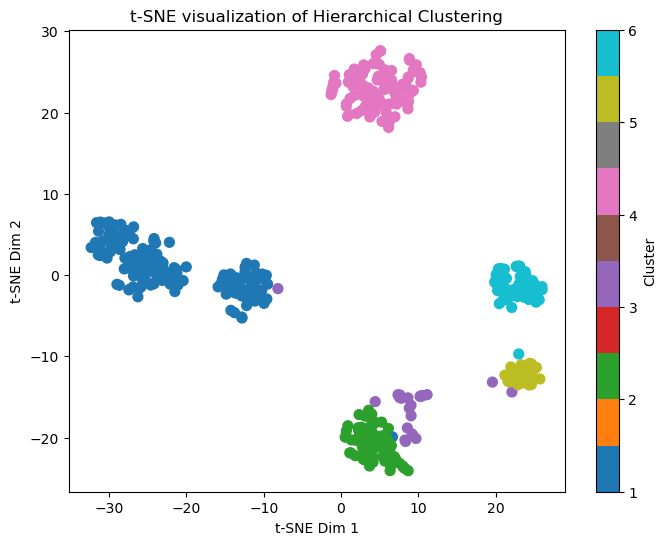

In [263]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(df_log)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap="tab10", s=50)
plt.title("t-SNE visualization of Hierarchical Clustering")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(label="Cluster")
plt.show()

Most clusters are well seperated and dense within each other except for the clusters 2 and 3.

Cluster 3 has some outlier points that overlap with other clusters.


In [264]:
pd.Series(clusters).value_counts().sort_index()

1    157
2     68
3     23
4    104
5     33
6     55
Name: count, dtype: int64

In [269]:
sil_hir_ward = silhouette_score(df_log, clusters)
sil_hir_ward

0.4296588434359298

In [270]:
dbi_hir_ward = davies_bouldin_score(df_log, clusters)
dbi_hir_ward

1.115604113915748

In [275]:
chi_hir_ward = calinski_harabasz_score(df_log, clusters)
chi_hir_ward

263.5647100300605

In [276]:
add_results('Hir_ward', sil_hir_ward, dbi_hir_ward, chi_hir_ward)

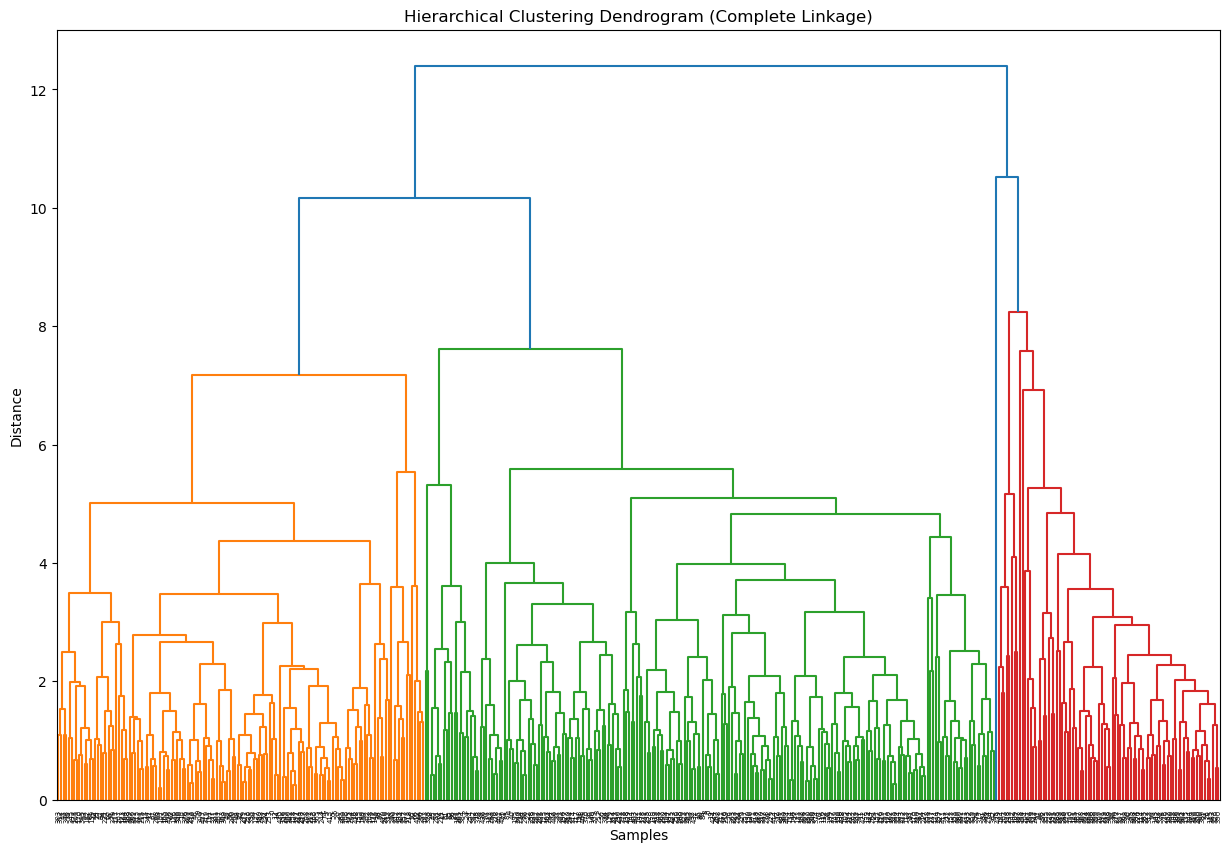

In [140]:
linkage_data_2 = linkage(df_log, method="complete")
plt.figure(figsize=(15,10))
dendrogram(linkage_data_2)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [250]:
scores = []
for t in range(2, 11):
    clusters = fcluster(linkage_data_2, t=t, criterion='maxclust')
    sil = silhouette_score(df_log, clusters)
    dbi = davies_bouldin_score(df_log, clusters)
    chi = calinski_harabasz_score(df_log, clusters)
    scores.append((t, sil, dbi, chi))

for s in scores:
    print(f"t={s[0]}: Silhouette={s[1]:.3f}  DBI={s[2]:.3f}  CHI={s[3]:.3f}")

t=2: Silhouette=0.147  DBI=1.815  CHI=53.124
t=3: Silhouette=0.140  DBI=1.353  CHI=28.420
t=4: Silhouette=0.227  DBI=1.328  CHI=78.302
t=5: Silhouette=0.212  DBI=1.246  CHI=63.991
t=6: Silhouette=0.164  DBI=1.303  CHI=62.124
t=7: Silhouette=0.161  DBI=1.166  CHI=53.322
t=8: Silhouette=0.148  DBI=1.217  CHI=50.053
t=9: Silhouette=0.145  DBI=1.128  CHI=44.701
t=10: Silhouette=0.082  DBI=1.320  CHI=48.422


In [256]:
clusters_2 = fcluster(linkage_data_2, t=4, criterion="maxclust")
print("Cluster assignments:", clusters_2)

Cluster assignments: [1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 2 1 2 2 2 1 3 2 2 2 1 3 2 2 2 1 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 2 2 2
 1 4 2 1 3 2 2 1 1 2 2 2 2 2 3 2 3 2 2 2 1 1 1 3 3 3 1 1 1 2 2 2 1 1 1 3 2
 1 2 2 3 3 2 2 2 2 2 3 3 1 2 2 2 1 3 2 2 3 2 2 2 3 1 1 2 2 2 2 3 3 2 1 2 2
 3 2 2 2 3 2 3 1 1 2 1 1 1 3 2 1 1 1 1 2 3 3 1 1 1 1 2 1 2 2 2 2 1 2 1 2 3
 3 3 3 1 1 3 3 2 1 2 2 2 1 2 2 1 1 2 3 3 1 3 1 1 1 2 2 2 1 1 1 1 2 1 3 3 1
 3 2 3 2 1 2 3 2 2 2 2 3 2 2 3 2 3 2 2 2 3 1 1 1 2 3 2 2 2 2 2 1 2 3 2 2 2
 2 2 3 2 2 1 2 1 2 1 3 3 2 2 2 2 3 2 3 2 1 2 1 2 2 2 3 3 2 3 3 2 2 2 1 2 2
 2 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 3 2 1 3 2 3 1 2 2 3 2 2 2 3 2 2 2 2 1 2
 1 2 1 2 2 3 2 1 1 1 1 3 1 1 1 2 1 3 1 3 1 2 3 3 1 2 2 2 3 2 2 3 1 2 3 3 3
 2 2 2 2 2 3 1 2 2 1 3 2 2 3 2 3 2 2 3 3 3 2 2 2 3 3 1 3 3 3 3 2 2 2 2 3 2
 1 2 2 2 2 1 2 2 1 1 1 1 2 1 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1 2 3]


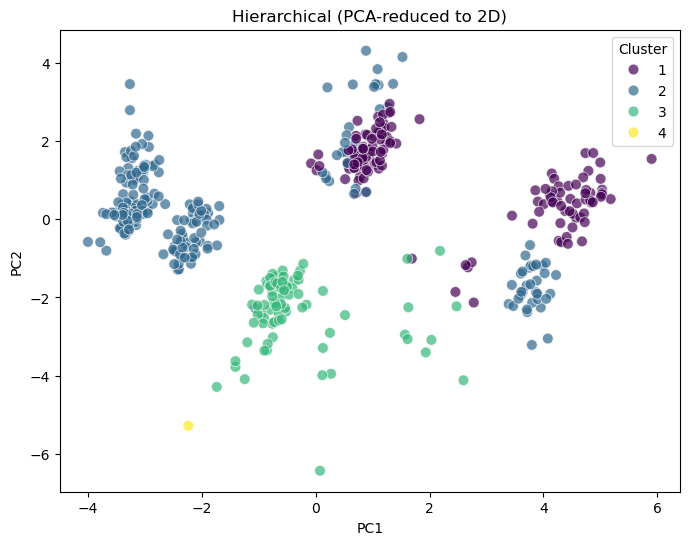

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Cluster                                                                         
1       -0.478323  0.750742  0.902624 -0.588577          1.005187    0.086795   
2        0.352979 -0.014708 -0.154602  0.304535         -0.261389    0.333900   
3       -0.125754 -1.192521 -1.017675  0.180755         -0.951817   -1.004202   
4        0.806722 -1.004409 -6.585828  0.849171         -3.308406    0.165965   

         k_clusters_7  hir_clusters  
Cluster                              
1            3.151079      4.748201  
2            1.412037      1.972222  
3            3.130952      2.202381  
4            3.000000      2.000000  


In [257]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_log)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_2

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    alpha=0.7,
    s=60
)
plt.title('Hierarchical (PCA-reduced to 2D)')
plt.show()

cluster_summary = df_log.copy()
cluster_summary['Cluster'] = clusters_2
cluster_profile = cluster_summary.groupby('Cluster').mean()
print(cluster_profile)

Cluster 1: Highest spending on deteregents_paper and grocery. Lower spending on milk and delicassen. Lowest spending on fresha and frozen products.

Cluster 2: Low spending for all categories overall. Avergae spending on delicassen, fresh and drozen products. Lower spending on milk,grocery and detergents_paper.

Cluster 3: Lower spending patterns than cluster 2.

Cluster 4: High spending on fresh and frozen. Very low spending on grocery, milk and detergents_paper but this is a single point in the cluster so it may be an outlier.

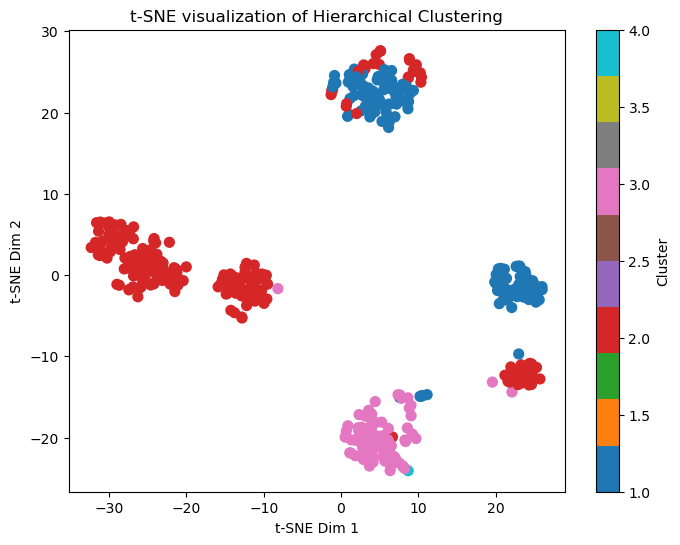

In [266]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(df_log)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters_2, cmap="tab10", s=50)
plt.title("t-SNE visualization of Hierarchical Clustering")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(label="Cluster")
plt.show()

Clusters 2 and 1 overlap a lot and are not all clusteres in a single space but every clusters has few points clustered in 2 different spaces.

The single point from cluster 4 is so similar to cluster 3.

In [265]:
pd.Series(clusters_2).value_counts().sort_index()

1    139
2    216
3     84
4      1
Name: count, dtype: int64

In [272]:
sil_hir_com = silhouette_score(df_log, clusters_2)
sil_hir_com

0.2269805712742134

In [273]:
dbi_hir_com = davies_bouldin_score(df_log, clusters_2)
dbi_hir_com

1.3278569852745443

In [274]:
chi_hir_com = calinski_harabasz_score(df_log, clusters_2)
chi_hir_com

78.3023746609642

The ward method has better evaluation indicies than the complete method.

## DBSCAN

In [279]:
for eps in [0.1, 0.3, 0.5, 1, 2, 2.5, 3,3.5,4]:
    db = DBSCAN(eps=eps, min_samples=4)
    labels = db.fit_predict(df_log)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps} → clusters={n_clusters}, noise={(labels == -1).sum()}")

eps=0.1 → clusters=0, noise=440
eps=0.3 → clusters=0, noise=440
eps=0.5 → clusters=5, noise=419
eps=1 → clusters=8, noise=126
eps=2 → clusters=5, noise=18
eps=2.5 → clusters=4, noise=7
eps=3 → clusters=1, noise=4
eps=3.5 → clusters=1, noise=2
eps=4 → clusters=1, noise=2


In [280]:
dbscan = DBSCAN(eps=2.5, min_samples=4)
clusters_db = dbscan.fit_predict(df_log)

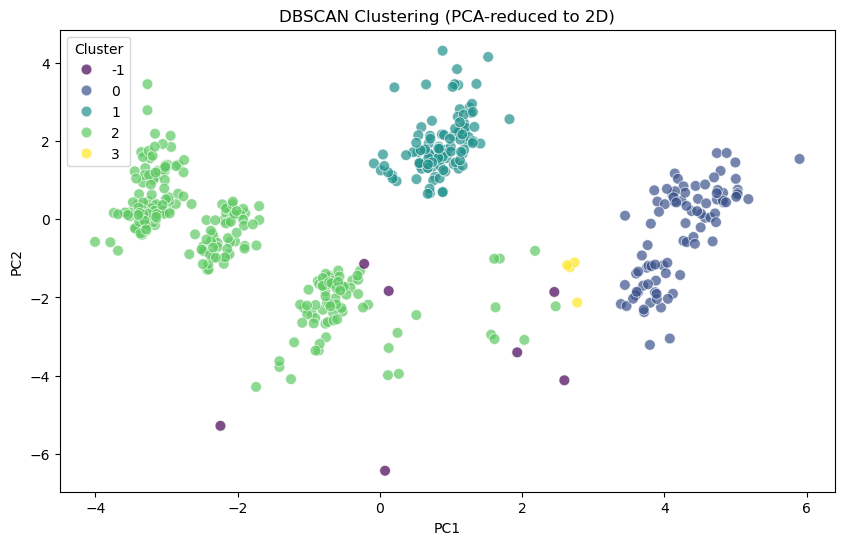

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Cluster                                                                         
-1      -1.597244 -1.178644 -1.289606 -0.361671         -2.124859   -1.372445   
 0      -0.877971  0.424167  0.404968 -0.932057          0.445256   -0.033684   
 1       0.135816  0.966675  0.929007  0.078937          0.991852    0.519457   
 2       0.374663 -0.539307 -0.533512  0.353559         -0.552740   -0.145394   
 3      -3.619453 -0.448641  0.803934 -1.862534          0.884589   -1.748433   

         k_clusters_7  hir_clusters  
Cluster                              
-1           3.714286      2.857143  
 0           5.227273      5.625000  
 1           1.923077      4.000000  
 2           1.295359      1.392405  
 3           4.000000      3.000000  


In [284]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_log)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_db 

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    alpha=0.7,
    s=60
)
plt.title("DBSCAN Clustering (PCA-reduced to 2D)")
plt.show()

cluster_summary = df_log.copy()
cluster_summary['Cluster'] = clusters_db
cluster_profile = cluster_summary.groupby('Cluster').mean()
print(cluster_profile)


The -1 points are noise

Cluster 0: Average spending on milk.grocery and detergents_paper. Lower spending on delicassen. Very low spending on frozen and fresh products.

Cluster 1: High spending on milk, grocery and average spending on delicassen.Lowest spending on frozen and fresh products.

Cluster 2: Below average spending on frozen and fresh products. Low spending on the rest of the categories. The biggest cluster and scattered around the graph.

Cluster 3:High spending on grocery and detergents_paper. Very low spending on frozen and delicassen and lowest spending on fresh products.


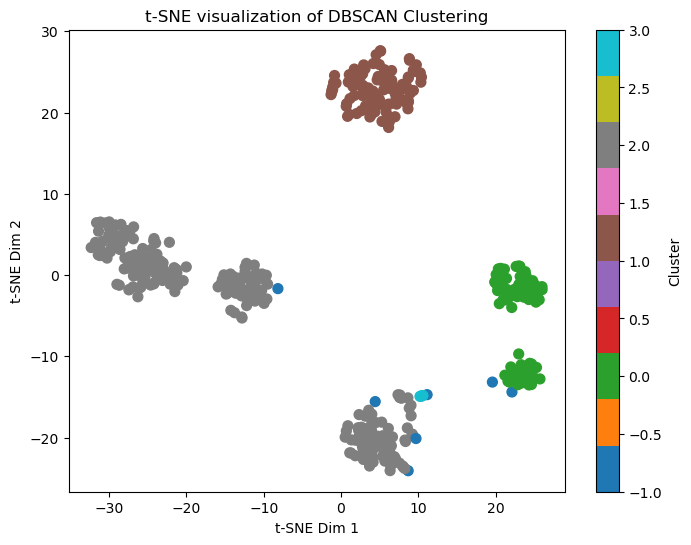

In [286]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(df_log)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters_db, cmap="tab10", s=50)
plt.title("t-SNE visualization of DBSCAN Clustering")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(label="Cluster")
plt.show()

The 4 clusters seem to be well seperated execpt for cluster 3 which is scattered around the graph.
Cluster 1 seems to be dense and clustered around 1 space. UNlike clusters 0 and 2 which are dense also but divided onto 2 different spaces.

In [285]:
pd.Series(clusters_db).value_counts().sort_index()

-1      7
 0     88
 1    104
 2    237
 3      4
Name: count, dtype: int64

In [287]:
sil_db = silhouette_score(df_log, clusters_db)
sil_db

0.37566656598037285

In [288]:
dbi_db = davies_bouldin_score(df_log, clusters_db)
dbi_db

1.425671457265331

In [289]:
chi_db = calinski_harabasz_score(df_log, clusters_db)
chi_db

156.58725450761602

In [291]:
add_results('DBSCAN', sil_db, dbi_db, chi_db)

## MeanShift

In [305]:
quantiles = [0.1, 0.15, 0.2, 0.3, 0.4, 0.5,1]

for q in quantiles:
    bw = estimate_bandwidth(df_log, quantile=q, n_samples=500)
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    labels = ms.fit_predict(df_log)

    n_clusters = len(np.unique(labels))

    if n_clusters > 1:
        sil = silhouette_score(df_log, labels)
        dbi = davies_bouldin_score(df_log, labels)
        chi = calinski_harabasz_score(df_log, labels)
    else:
        sil, dbi, chi = None, None, None

    print(f"q={q:.2f}, bandwidth={bw:.3f}, clusters={n_clusters}, "
          f"Silhouette={sil}, DBI={dbi}, CHI={chi}")

q=0.10, bandwidth=2.221, clusters=15, Silhouette=0.40875893076312236, DBI=0.8484396976306999, CHI=117.87151587506183
q=0.15, bandwidth=2.640, clusters=11, Silhouette=0.31258802402119185, DBI=1.017860354915746, CHI=93.94874460284365
q=0.20, bandwidth=3.025, clusters=7, Silhouette=0.38228456095063135, DBI=1.0249679471079245, CHI=136.24889391800207
q=0.30, bandwidth=3.766, clusters=3, Silhouette=0.18528852840175886, DBI=1.203556377509395, CHI=16.79125240069167
q=0.40, bandwidth=4.232, clusters=3, Silhouette=0.19140138305791168, DBI=1.2213229286605125, CHI=15.16676197910686
q=0.50, bandwidth=4.667, clusters=1, Silhouette=None, DBI=None, CHI=None
q=1.00, bandwidth=9.411, clusters=1, Silhouette=None, DBI=None, CHI=None


In [306]:
bandwidth = estimate_bandwidth(df_log, quantile=0.2, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
clusters_ms = meanshift.fit_predict(df_log)

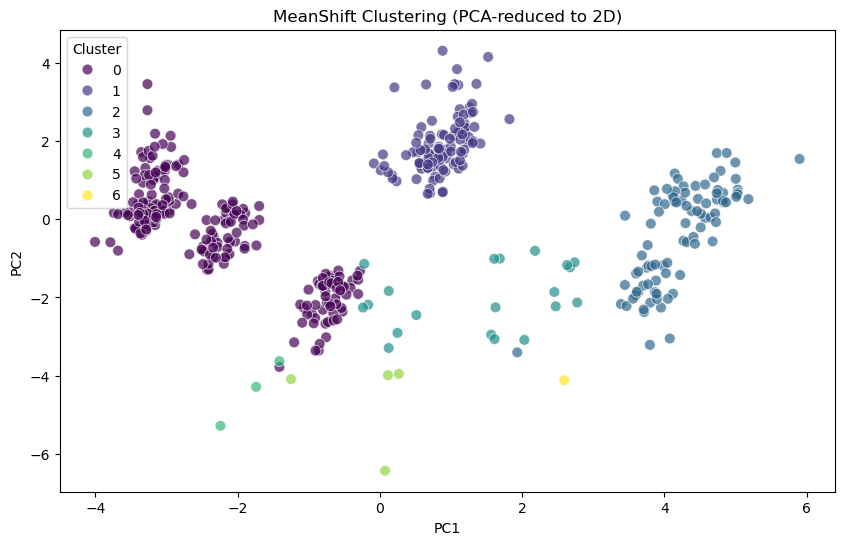

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Cluster                                                                         
0        0.484897 -0.501547 -0.490634  0.431050         -0.526191    0.011347   
1        0.135816  0.966675  0.929007  0.078937          0.991852    0.519457   
2       -0.876860  0.405579  0.401629 -0.922192          0.406419   -0.028789   
3       -1.773993 -0.366782 -0.241110 -1.014621         -0.222494   -2.242314   
4        0.719083 -1.894078 -3.945024  0.400055         -3.095381    0.230247   
5       -0.947948 -2.908206 -2.157061 -0.819139         -1.994968   -2.379844   
6       -5.162332 -2.141309  0.372671  1.834411         -2.372177   -0.271293   

         k_clusters_7  hir_clusters  
Cluster                              
0            1.118721      1.283105  
1            1.923077      4.000000  
2            5.235955      5.595506  
3            3.550000      2.900000  
4            3.000000      2.000000  
5   

In [308]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_log)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_ms 

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    alpha=0.7,
    s=60
)
plt.title("MeanShift Clustering (PCA-reduced to 2D)")
plt.show()

cluster_summary = df_log.copy()
cluster_summary['Cluster'] = clusters_ms
cluster_profile = cluster_summary.groupby('Cluster').mean()
print(cluster_profile)



Cluster 0 : Average spending on fresh and frozen  products. Low spending on all of the other categories.

Cluster 1: High spending on milk, grocery, detergents_paper and average spending on delicassen products. Lower spending on fresh and frozen products.

Cluster 2: Average spending on detergent_paper, milk and grocery. Low spending on the rest of the categories.

Cluster 3: Generally, low spending trends. Lowest spening on delicassen, frozen and fresh products.

Cluster 4:Very low spending on detergents_paper, grocery and milk. A little higher spending on delicassen. Average spending frozen and highest spending on fresh products.

Cluster 5: Very low spending on all categories. The cluster only has 3 data points.

Cluster 6: Very low spending on fresh products. A bit higher spedning on milk and detergents_paper. Higher spending on grocery and highest spending on frozen products.

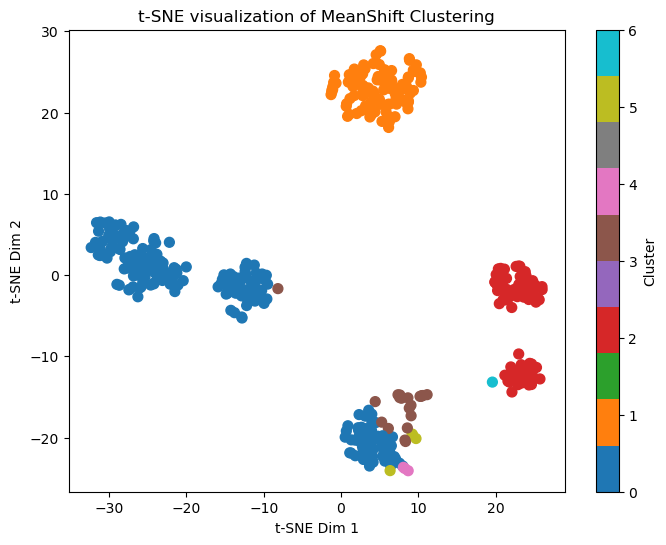

In [309]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(df_log)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters_ms, cmap="tab10", s=50)
plt.title("t-SNE visualization of MeanShift Clustering")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(label="Cluster")
plt.show()

Clusters 0, 1 and 2 seem to be well seperated but cluster 2 is clustered in 2 spaces.

Cluster 0 is not condesed in a defined space and is scattered over a somehow wide range.

Cluster 3, 5 and 6 overlap with part of cluster 0 and they are not well seperated/

In [310]:
pd.Series(clusters_ms).value_counts().sort_index()

0    219
1    104
2     89
3     20
4      3
5      4
6      1
Name: count, dtype: int64

In [311]:
sil_ms = silhouette_score(df_log, clusters_ms)
sil_ms

0.38228456095063135

In [312]:
dbi_ms = davies_bouldin_score(df_log, clusters_ms)
dbi_ms

1.0249679471079245

In [313]:
chi_ms = calinski_harabasz_score(df_log, clusters_ms)
chi_ms

136.24889391800207

In [314]:
add_results('MeanShift', sil_ms, dbi_ms, chi_ms)

In [315]:
results

[{'method': 'Kmeans',
  'silhouette': 0.3383038160247702,
  'dbi': 1.171655621951709,
  'chi': 191.53732756424597},
 {'method': 'Hir_ward',
  'silhouette': 0.4296588434359298,
  'dbi': 1.115604113915748,
  'chi': 263.5647100300605},
 {'method': 'DBSCAN',
  'silhouette': 0.37566656598037285,
  'dbi': 1.425671457265331,
  'chi': 156.58725450761602},
 {'method': 'MeanShift',
  'silhouette': 0.38228456095063135,
  'dbi': 1.0249679471079245,
  'chi': 136.24889391800207}]

In [316]:
df_results = pd.DataFrame(results)
df_results = df_results.round(3)
df_results

,method,silhouette,dbi,chi
0,Kmeans,0.338,1.172,191.537
1,Hir_ward,0.430,1.116,263.565
2,DBSCAN,0.376,1.426,156.587
3,MeanShift,0.382,1.025,136.249


Seems that the hierarchical clustering using the ward linkage had the highest silhoutte score, low dbi score and highest chi score outperforms the other methods.

Most algorithms had 2 common clusters which are
1-Highest spending on fresh and frozen products.(Maybe HORECA)
2-Highest spedning on milk, grocery and detergents.(Maybe retail channels)